In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

((array([6.03667e+05, 2.44150e+04, 3.48760e+04, 2.61992e+05, 3.24730e+04,
         3.04550e+04, 2.33188e+05, 2.92950e+04, 1.89670e+04, 1.44436e+05,
         1.84810e+04, 1.55460e+04, 1.32792e+05, 1.49210e+04, 7.20200e+03,
         5.34910e+04, 1.35470e+04, 4.76270e+04, 1.23630e+04, 4.74550e+04,
         1.06140e+04, 3.51020e+04, 7.42100e+03, 2.27340e+04, 4.16200e+03,
         1.06870e+04, 1.59640e+04, 2.73700e+03, 6.86200e+03, 7.14700e+03,
         5.91400e+03, 5.43200e+03, 4.78000e+03, 4.05600e+03, 3.35800e+03,
         7.83000e+02, 3.55800e+03, 6.10600e+03, 3.52200e+03, 3.14400e+03,
         3.20500e+03, 3.37600e+03, 3.84300e+03, 4.10100e+03, 3.66800e+03,
         8.59000e+02, 3.96800e+03, 6.83000e+03, 3.11100e+03, 1.76700e+03,
         3.10000e+02, 1.16600e+03, 1.72900e+03, 9.54000e+02, 2.71000e+02,
         1.42500e+03, 2.99000e+02, 8.68000e+02, 1.35300e+03, 3.75000e+02,
         1.29300e+03, 3.60000e+02, 1.44500e+03, 8.85000e+02, 2.81000e+02,
         1.53200e+03, 2.86000e+02, 7.7

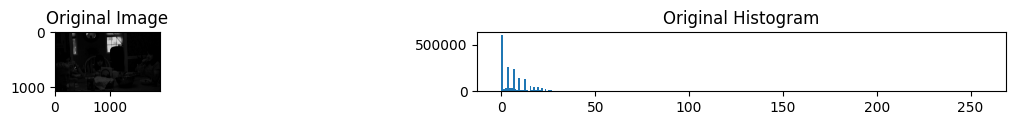

In [8]:
# 1. Görüntüyü yükleme histogramını çizdirme
img = cv2.imread('goruntu3.png', 0)
plt.figure(figsize = (15,10))
plt.subplots_adjust(hspace=1)
plt.subplot(721),plt.imshow(img,cmap='gray'),plt.title('Original Image')
plt.subplot(722).hist(img.flatten(),256,[0,256]),plt.title('Original Histogram')

((array([603667.,      0.,      0.,      0.,  24415.,      0.,      0.,
              0.,      0.,      0.,  34876.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
         261992.,      0.,      0.,      0.,      0.,  32473.,      0.,
              0.,      0.,      0.,      0.,  30455.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,  

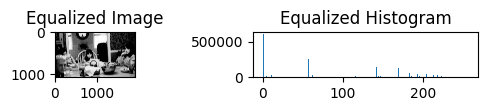

In [9]:
# 2. Histogram eşitleme uygulama, histogram eşitleme sonrası görüntüyü ve histogramını çizdirme
equ_img = cv2.equalizeHist(img)
plt.subplot(723),plt.imshow(equ_img, cmap='gray'),plt.title('Equalized Image')
plt.subplot(724).hist(equ_img.flatten(), 256, [0, 256]),plt.title('Equalized Histogram')

((array([2124274.,   87246.,   24173.,   47024.,   20349.,   13612.,
           12431.,   12404.,   15076.,   17978.,   19083.,   25432.,
           19936.,   28390.,   22327.,   15848.,   13445.,   10558.,
            8762.,    8889.,   14130.,   11460.,   11771.,    9019.,
            8742.,    8238.,    7388.,    6400.,    5263.,    4914.,
            5530.,    6142.,    8634.,    8228.,    6989.,    6518.,
            7603.,    8428.,   10225.,    9268.,    8869.,   12790.,
           16416.,   26471.,   21880.,   35215.,   28425.,   31165.,
           26627.,   28959.,   29664.,   32247.,   30513.,   34870.,
           40405.,   53023.,  137375.,   80064.,   57342.,   43609.,
           50563.,   39222.,   40523.,   30697.,   28688.,   22835.,
           23335.,   22460.,   20360.,   18471.,   14718.,   12935.,
           12695.,   12254.,   10886.,   11973.,   17735.,   14416.,
           11824.,    9419.,    9269.,    8422.,    8152.,    7947.,
            8229.,    8463.,    80

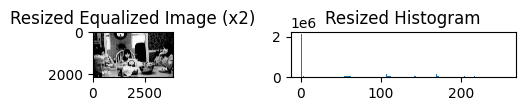

In [10]:
# 3. Görüntüye bicubic interpolasyon ile iki kat büyütme, görüntüyü ve histogramını çizdirme
resized_img = cv2.resize(equ_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.subplot(725),plt.imshow(resized_img, cmap='gray'),plt.title('Resized Equalized Image (x2)')
plt.subplot(726).hist(resized_img.flatten(), 256, [0, 256]),plt.title('Resized Histogram')

((array([2.124274e+06, 3.275600e+04, 1.339000e+04, 6.964700e+04,
         1.809300e+04, 1.077700e+04, 1.730600e+04, 1.213600e+04,
         1.391900e+04, 1.169800e+04, 9.678000e+03, 1.687200e+04,
         6.256000e+03, 2.810300e+04, 6.109000e+03, 7.813000e+03,
         1.073600e+04, 7.322000e+03, 8.069000e+03, 9.262000e+03,
         1.611700e+04, 1.745300e+04, 9.544000e+03, 7.787000e+03,
         6.021000e+03, 5.567000e+03, 6.677000e+03, 7.582000e+03,
         5.037000e+03, 5.503000e+03, 5.149000e+03, 8.296000e+03,
         9.643000e+03, 5.973000e+03, 4.228000e+03, 4.842000e+03,
         4.060000e+03, 4.827000e+03, 3.843000e+03, 2.731000e+03,
         2.956000e+03, 2.778000e+03, 3.181000e+03, 7.070000e+03,
         3.893000e+03, 3.097000e+03, 3.842000e+03, 2.947000e+03,
         1.787000e+03, 3.018000e+03, 1.960000e+03, 1.730000e+03,
         2.332000e+03, 1.286000e+03, 1.653000e+03, 1.347000e+03,
         3.600000e+03, 1.762000e+03, 2.111000e+03, 1.870000e+03,
         1.027000e+03, 1.

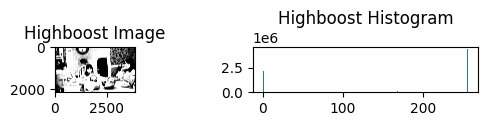

In [11]:
# 4. Görüntüye unsharp masking ve highboost filtering uygulama, görüntüyü ve histogramını çizdirme
gauss = cv2.GaussianBlur(resized_img, (7, 7), 0)
# Apply Unsharp masking
unsharp_img = cv2.addWeighted(resized_img, 2, gauss, -1, 0)
highboost_img = cv2.addWeighted(resized_img,1, unsharp_img, 2 ,0)
plt.subplot(727),plt.imshow(highboost_img, cmap='gray'),plt.title('Highboost Image')
plt.subplot(728).hist(highboost_img.flatten(), 256, [0, 256]),plt.title('Highboost Histogram')


(<Axes: title={'center': 'Highboost Magnitude Spectrum'}>,
 Text(0.5, 1.0, 'Highboost Magnitude Spectrum'))

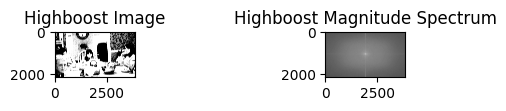

In [12]:
# 5. Highboost sonucunun dft2 sini alma dft2 yi shift etme, görüntüyü ve genlik spektrumunu çizdirme.
size = highboost_img.shape
row = size[0]
col = size[1]
I = cv2.dft(np.float32(highboost_img), flags=cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(I)
magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))

plt.subplot(729),plt.imshow(highboost_img, cmap='gray'),plt.title('Highboost Image')
plt.subplot(7,2,10),plt.imshow(magnitude_spectrum, cmap='gray'),plt.title('Highboost Magnitude Spectrum')

(<Axes: title={'center': 'Gaussian Mask'}>,
 Text(0.5, 1.0, 'Gaussian Mask'))

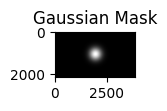

In [13]:
# 6. Görüntüye yarı çapı 200 olan gauss alçak geçiren filtre uygulama gauss filtresini çizdirme
D0 = 200
#Gaussian LPF
H = [[math.exp(-((i-col/2)**2+(j-row/2)**2)/(2*D0**2)) for i in range(col)] for j in range(row)]
plt.subplot(7,2,11),plt.imshow(H, cmap='gray'),plt.title('Gaussian Mask')

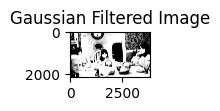

In [14]:
# 7. Görüntünün ters dft2 sini alıp görüntünün son halini çizdirme
If = np.zeros((row,col,2))
If[:,:,0]= I_shift[:,:,0]*H
If[:,:,1]= I_shift[:,:,1]*H
f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)
plt.subplot(7,2,12),plt.imshow(img_back[:,:,0], cmap='gray'),plt.title('Gaussian Filtered Image')

plt.show()
